In [2]:
# Google Colab
# Sets project folder as working directory ('.../My Drive/Colab Notebooks/cifar10_classification_autoencoder)
import sys
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab \Notebooks/cifar10_classification_autoencoder
!pwd
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder/cifar10_modules/')
!pip install matplotlib==3.1.0

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder
/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder
     |████████████████████████████████| 13.1MB 4.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


In [3]:
# Developed modules
from dataset import *
from modelling4 import *

Using TensorFlow backend.


In [0]:
# Suppress tensorflow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [0]:
set_random_seeds(42)

In [0]:
autoencoder_config= {'activity_regularizer': False,
                    'activity_regularizer_type': 'l1',
                    'activity_regularizer_value': 0.001,
                    'batch_norm': False, 
                    'batch_size': 32,
                    'callbacks': False,
                    'conv_blocks': 2,
                    'dropout': False,
                    'dropout_value': 0.2,
                    'early_stopping': False,
                    'early_stopping_delta': 0.1,
                    'early_stopping_patience': 10,
                    'epochs': 100,
                    'gaussian_noise_input': False,
                    'gaussian_noise_hidden': False,
                    'gaussian_noise_stddev': 0.1,
                    'image_shape': [32, 32, 3],
                    'init_num_filters': 32,
                    'kernel_regularizer': False,
                    'kernel_regularizer_type': 'l2',
                    'kernel_regularizer_value': 0.001,
                    'layers_per_block': 2,
                    'loss': 'mean_squared_error',
                    'lr': 0.001,
                    'optimizer': 'adam'}

In [0]:
save_config(autoencoder_config, 'autoencoder_config_base.json')

In [8]:
x_train, x_val, x_test, y_train, y_val, y_test, class_names= load_and_norm(0.22)

170500096/170498071 [==============================] - 4s 0us/step
Normalized by the maximum value of training set
Normalized by the maximum value of training set
Normalized by the maximum value of training set
**Training data**
Number of samples: 33150
airplane : 3910
automobile : 3891
bird : 1944
cat : 3874
deer : 1981
dog : 3913
frog : 3894
horse : 3889
ship : 3905
truck : 1949

**Validation data**
Number of samples: 9350
airplane : 1090
automobile : 1109
bird : 556
cat : 1126
deer : 519
dog : 1087
frog : 1106
horse : 1111
ship : 1095
truck : 551

**Test data**
Number of samples: 10000
airplane : 1000
automobile : 1000
bird : 1000
cat : 1000
deer : 1000
dog : 1000
frog : 1000
horse : 1000
ship : 1000
truck : 1000






Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          

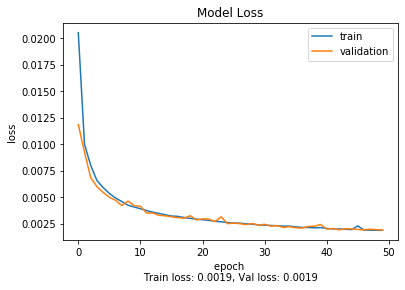

In [0]:
#1
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['batch_size'] = 64
autoencoder_config['epochs'] = 50
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_filename= 'autoencoder_4m_adam_50epochs_3blocks'
save_config(autoencoder_config,'autoencoder_config_4m_adam_50epochs_3blocks.json')
encoder_filename= 'encoder_4m_adam_50epochs_3blocks'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

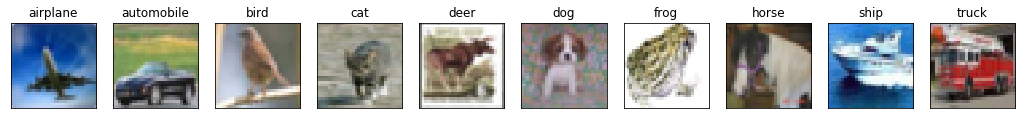

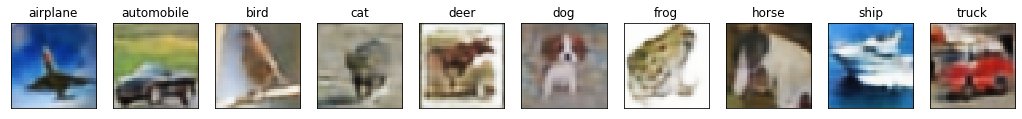

In [0]:
autoencoder=load_saved_model(autoencoder_filename)
x_pred= autoencoder.predict(x_val)
image_list= random_images(y_val, class_names)
show_image_list(x_val,y_val,class_names,image_list)
show_image_list(x_pred,y_val,class_names,image_list)





Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          

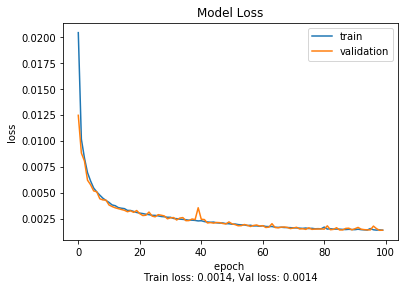

In [0]:
#2
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['batch_size'] = 64
autoencoder_config['epochs'] = 100
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_filename= 'autoencoder_4m_adam_100epochs_3blocks'
save_config(autoencoder_config,'autoencoder_config_4m_adam_100epochs_3blocks.json')
encoder_filename= 'encoder_4m_adam_100epochs_3blocks'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

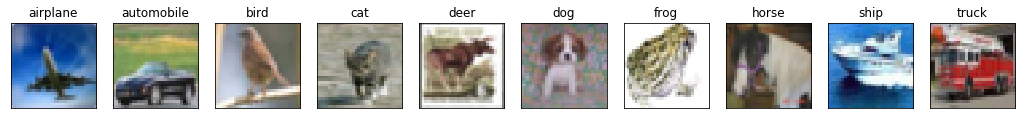

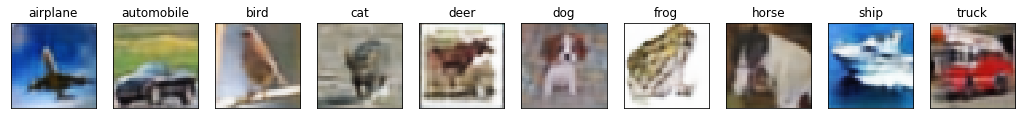

In [0]:
autoencoder=load_saved_model(autoencoder_filename)
x_pred= autoencoder.predict(x_val)
image_list= random_images(y_val, class_names)
show_image_list(x_val,y_val,class_names,image_list)
show_image_list(x_pred,y_val,class_names,image_list)



Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18

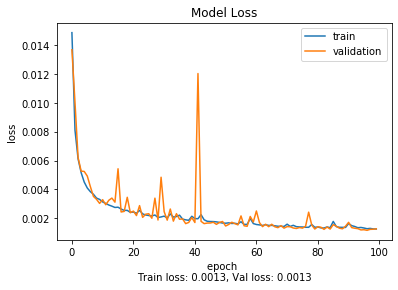

In [0]:
#3
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['batch_size'] = 64
autoencoder_config['epochs'] = 100
autoencoder_config['batch_norm'] = True
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_filename= 'autoencoder_4m_adam_100epochs_3blocks_batch_norm'
save_config(autoencoder_config,'autoencoder_config_4m_adam_100epochs_3blocks_batch_norm.json')
encoder_filename= 'encoder_4m_adam_100epochs_3blocks'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

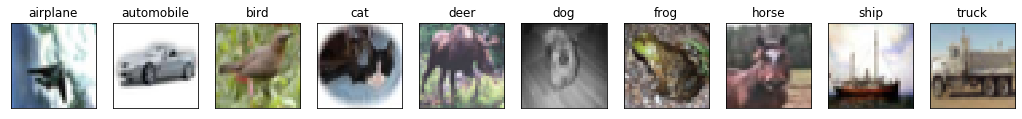

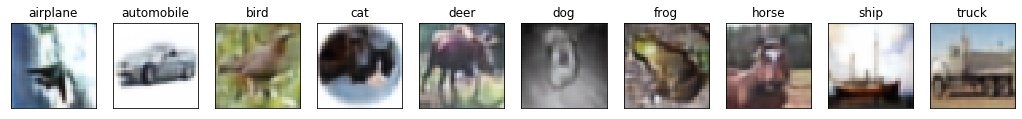

In [0]:
autoencoder=load_saved_model(autoencoder_filename)
x_pred= autoencoder.predict(x_val)
image_list= random_images(y_val, class_names)
show_image_list(x_val,y_val,class_names,image_list)
show_image_list(x_pred,y_val,class_names,image_list)

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_61 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_62 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0   

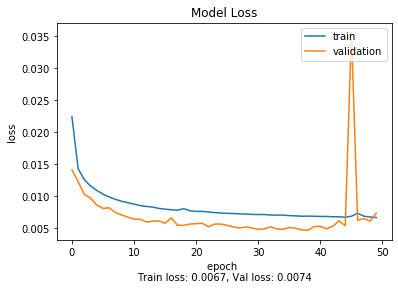

In [0]:
#4
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['batch_size'] = 128
autoencoder_config['epochs'] = 50
autoencoder_config['batch_norm'] = True
autoencoder_config['dropout'] = True
autoencoder_config['dropout_value'] = 0.5
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_filename= 'autoencoder_4m_adam_50epochs_3blocks_batch_norm_05dropout'
save_config(autoencoder_config,'autoencoder_config_4m_adam_50epochs_3blocks_batch_norm_05dropout.json')
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_batch_norm_05dropout'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

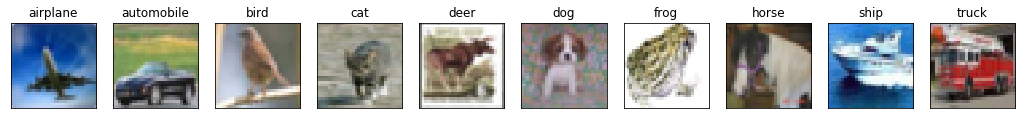

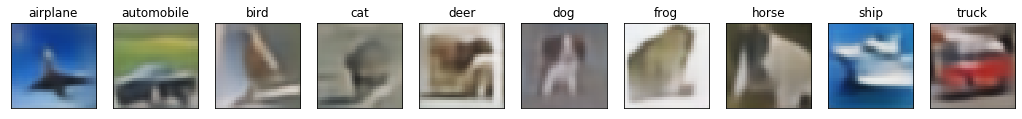

In [0]:
autoencoder=load_saved_model(autoencoder_filename)
x_pred= autoencoder.predict(x_val)
image_list= random_images(y_val, class_names)
show_image_list(x_val,y_val,class_names,image_list)
show_image_list(x_pred,y_val,class_names,image_list)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0        

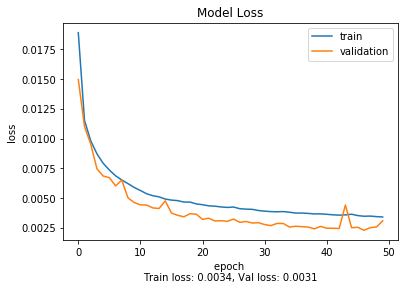

In [0]:
#5
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['batch_size'] = 128
autoencoder_config['epochs'] = 50
autoencoder_config['batch_norm'] = True
autoencoder_config['dropout'] = True
autoencoder_config['dropout_value'] = 0.2
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_filename= 'autoencoder_4m_adam_50epochs_3blocks_batch_norm_02dropout'
save_config(autoencoder_config,'autoencoder_config_4m_adam_50epochs_3blocks_batch_norm_02dropout.json')
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_batch_norm_02dropout'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

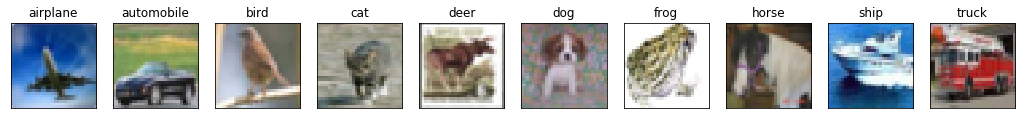

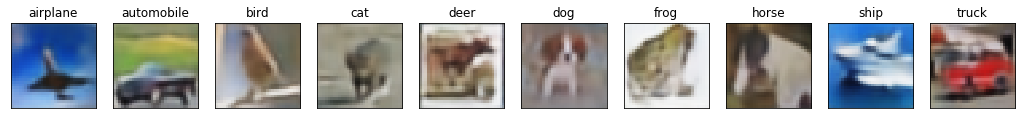

In [0]:
autoencoder=load_saved_model(autoencoder_filename)
x_pred= autoencoder.predict(x_val)
image_list= random_images(y_val, class_names)
show_image_list(x_val,y_val,class_names,image_list)
show_image_list(x_pred,y_val,class_names,image_list)













Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128

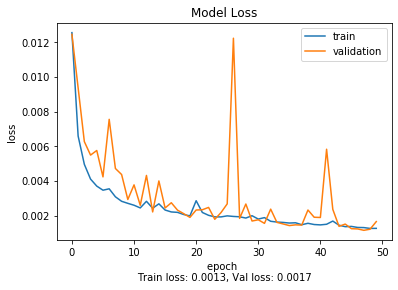

In [9]:
#6
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['init_num_filters'] = 64
autoencoder_config['batch_size'] = 64
autoencoder_config['epochs'] = 50
autoencoder_config['batch_norm'] = True
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_filename= 'autoencoder_4m_adam_50epochs_3blocks_64init_batch_norm'
save_config(autoencoder_config,'autoencoder_config_4m_adam_50epochs_3blocks_64init_batch_norm.json')
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_64init_batch_norm'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

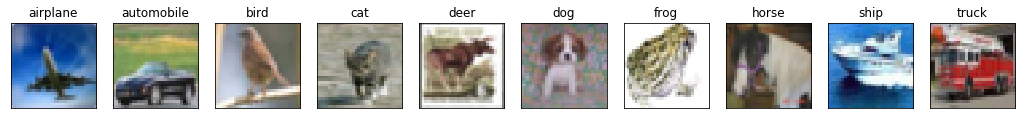

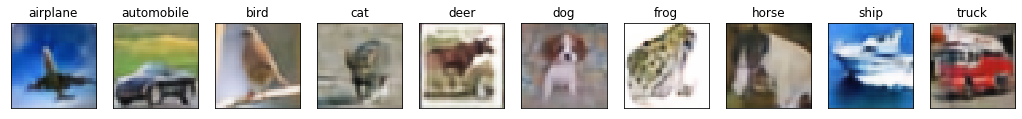

In [10]:
autoencoder=load_saved_model(autoencoder_filename)
x_pred= autoencoder.predict(x_val)
image_list= random_images(y_val, class_names)
show_image_list(x_val,y_val,class_names,image_list)
show_image_list(x_pred,y_val,class_names,image_list)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
__________

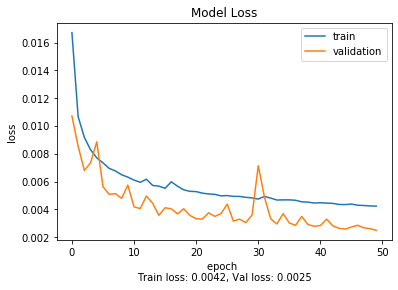

In [12]:
#7
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['init_num_filters'] = 64
autoencoder_config['batch_size'] = 64
autoencoder_config['epochs'] = 50
autoencoder_config['dropout'] = True
autoencoder_config['dropout_value'] = 0.5
autoencoder_config['batch_norm'] = True
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_filename= 'autoencoder_4m_adam_50epochs_3blocks_64init_batch_norm_05dropout'
save_config(autoencoder_config,'autoencoder_config_4m_adam_50epochs_3blocks_64init_batch_norm_05dropout.json')
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_64init_batch_norm_05dropout'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

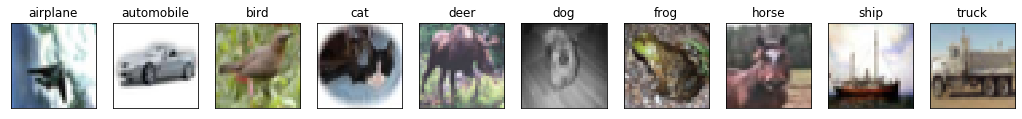

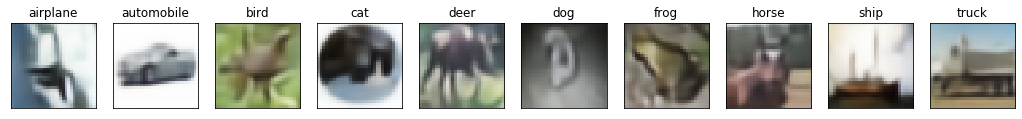

In [13]:
autoencoder=load_saved_model(autoencoder_filename)
x_pred= autoencoder.predict(x_val)
image_list= random_images(y_val, class_names)
show_image_list(x_val,y_val,class_names,image_list)
show_image_list(x_pred,y_val,class_names,image_list)

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
gaussian_noise_4 (GaussianNo (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_61 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_62 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0   

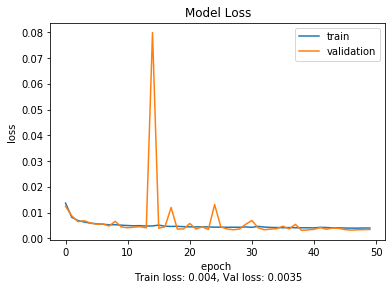

In [18]:
#8
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['init_num_filters'] = 64
autoencoder_config['batch_size'] = 64
autoencoder_config['epochs'] = 50
autoencoder_config['gaussian_noise_input'] = True
autoencoder_config['gaussian_noise_stddev'] = 0.2
autoencoder_config['batch_norm'] = True
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_filename= 'autoencoder_4m_adam_50epochs_3blocks_64init_batch_norm_02gaussian_noise_input'
save_config(autoencoder_config,'autoencoder_config_4m_adam_50epochs_3blocks_64init_batch_norm_02gaussian_noise_input.json')
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_64init_batch_norm_02gaussian_noise_input'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

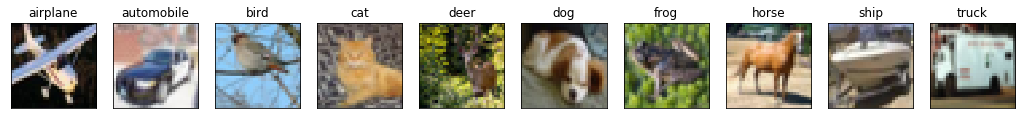

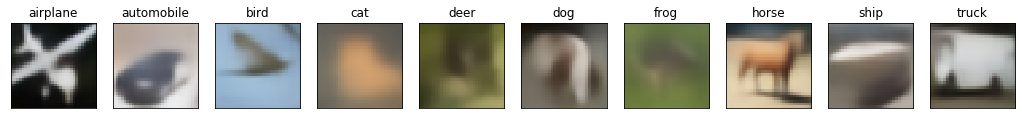

In [16]:
autoencoder=load_saved_model(autoencoder_filename)
x_pred= autoencoder.predict(x_val)
image_list= random_images(y_val, class_names)
show_image_list(x_val,y_val,class_names,image_list)
show_image_list(x_pred,y_val,class_names,image_list)